# Problem Statement:
 To predict whether a liability customer will buy a personal loan or not and identify Which segment of customers should be targeted more for asset products


# Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#load the dataset
loan = pd.read_csv('/Users/mac/Documents/PG AI MACHINE LEARNING/Loan_Modelling.csv')

In [3]:
#view dataset
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#view dimension of dataset
loan.shape

(5000, 14)

* the dataset contains 5000 rows and 14 columns

In [5]:
#view data structure
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* all variables are numerical, some will require treating them as categorical variables

In [13]:
#check for missing values
loan.isna().sum()

ID                     0
Age                    0
Experience            29
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
dtype: int64

In [6]:
#statistical data summary
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* Some int variables behave as categorical with values of 0 and 1 and it will make more sense to handle them as such. These are : Education,Securities_Account,Online,CD_Account,CreditCard
* There is a negative value of -3 in experience, this seems abnormal and should be investigated further for data entry issues
* ID and Zip code will not be needed in the modelling and should be dropped
* Minimum income earned is usd8,000 , 75th percentile is usd98,000 while max is usd2.24m. There is a huge gap between max and 75th percentile in income earned indicating possible outliers
* More than 50% of the customers have internet banking
* Very few customers are on personal loan 
* 75% of the customers are on education level less than or equal to 3
* Customer age distribution is between 23yrs old and 55 yrs old

In [7]:
# check the number of records with negative values in experience column
loan[loan['Experience'] < 0]['Experience'].count()

52

#### Age and experience are conceptually related, we will treat the negative experience values by matching the corresponding age positive value and replace with their median value

In [8]:
# getting the customer ID who has negative experience
dfExp = loan.loc[loan['Experience'] >0]
negExp = loan.Experience < 0
column_name = 'Experience'
mylist = loan.loc[negExp]['ID'].tolist()
#clean the negative variable
for id in mylist:
    age = loan.loc[np.where(loan['ID']==id)]["Age"].tolist()[0]
    education = loan.loc[np.where(loan['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    loan.loc[loan.loc[np.where(loan['ID']==id)].index, 'Experience'] = exp


In [9]:
# checking if there are records with negative experience
loan[loan['Experience'] < 0]['Experience'].count()

0

In [11]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
#check missing values again
loan.isna().sum()

ID                     0
Age                    0
Experience            29
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
dtype: int64

* The Experience variable now has 29 missing values, this will be treated later

In [14]:
#check for duplicates
loan.duplicated().sum()

0

* No duplicate value observed

In [15]:
#dropping ID and zip code, these variables will have no impact in our model
loan = loan.drop('ZIPCode',axis = 1)
loan = loan.drop('ID', axis = 1)

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          4971 non-null   float64
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB


* variables with 0 and 1 values only will be analysed as categorical variables 

## EDA
### Univariate analysis

#### Histogram of numerical variables

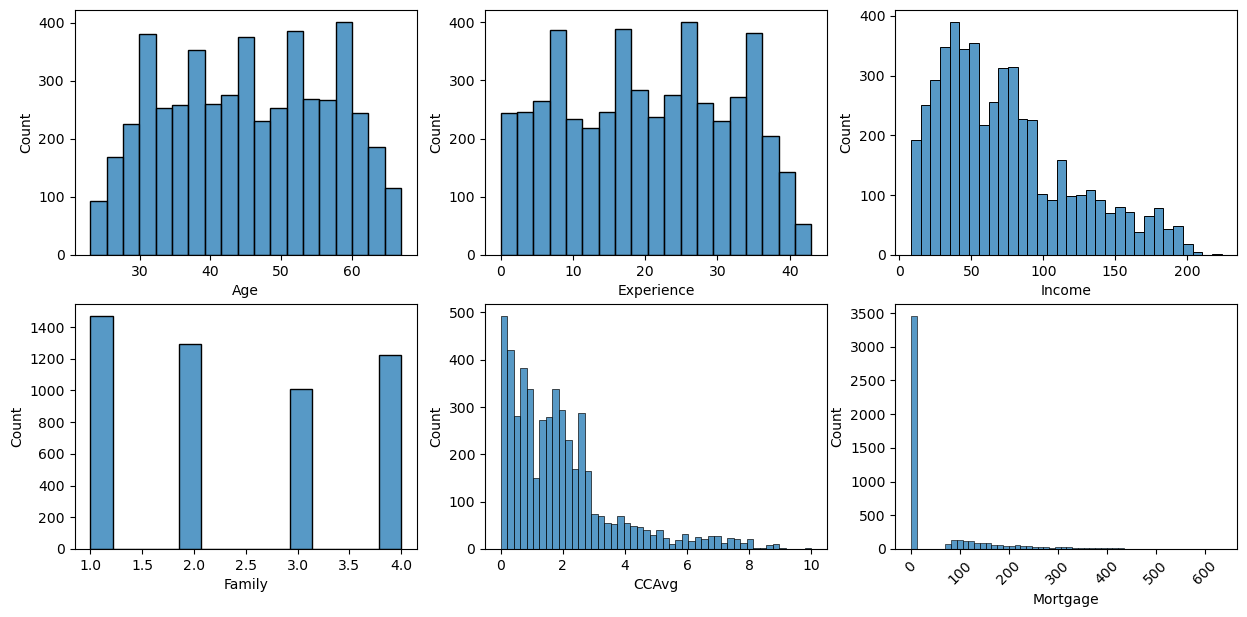

In [17]:
plt.figure(figsize=(15,7))
#histogram of age
plt.subplot(2,3,1)
sns.histplot(data = loan, x = 'Age')
#histogram of experience
plt.subplot(2,3,2)
sns.histplot(data = loan, x = 'Experience')
#histogram of income
plt.subplot(2,3,3)
sns.histplot(data = loan, x = 'Income')
#histogram of Family
plt.subplot(2,3,4)
sns.histplot(data = loan, x = 'Family')
#histogram of CCAvg
plt.subplot(2,3,5)
sns.histplot(data = loan, x = 'CCAvg')
#histogram of mortgage
plt.subplot(2,3,6)
sns.histplot(data = loan, x = 'Mortgage')
plt.xticks(rotation=45)
plt.show();

* Age and Experience Data is normally distributed
* Income, CCAvg and Mortgage is right skewed
* Most of the customers have a credit card spend limit less than usd3000 per month
* The highest family size is 4
* Majority of the customers earn income below 150,000
* Most customers have no mortgage

#### Box plot of numerical variables

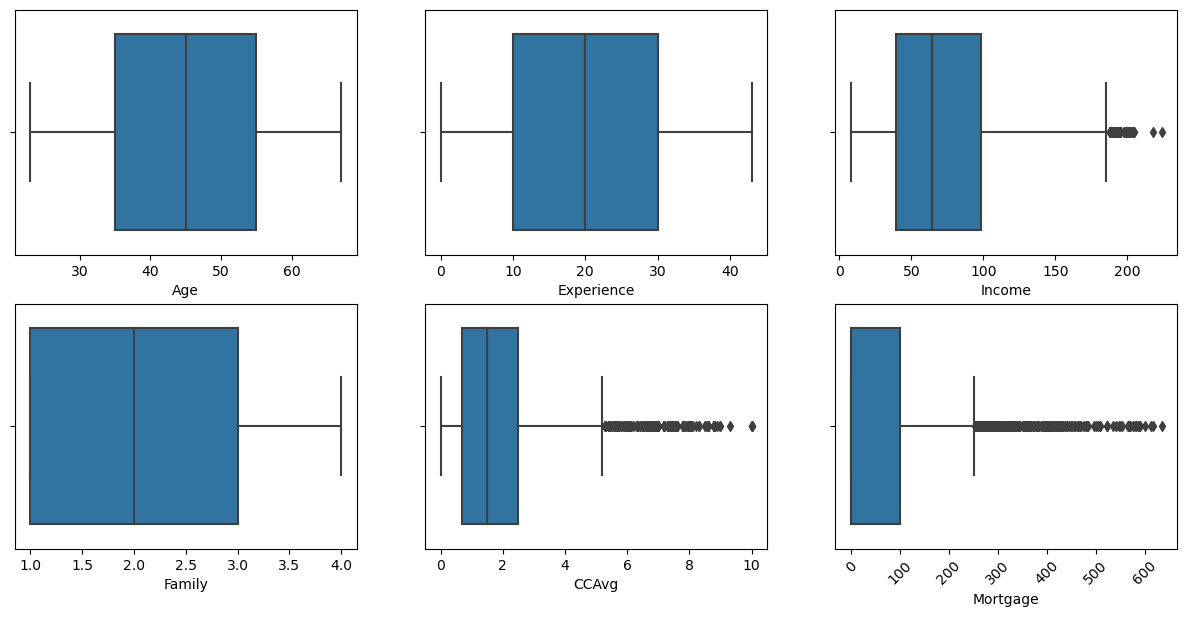

In [18]:
plt.figure(figsize=(15,7))
#boxplot of age
plt.subplot(2,3,1)
sns.boxplot(data = loan, x = 'Age')
#boxplot of experience
plt.subplot(2,3,2)
sns.boxplot(data = loan, x = 'Experience')
#boxplot of income
plt.subplot(2,3,3)
sns.boxplot(data = loan, x = 'Income')
#boxplot of Family
plt.subplot(2,3,4)
sns.boxplot(data = loan, x = 'Family')
#boxplot of CCAvg
plt.subplot(2,3,5)
sns.boxplot(data = loan, x = 'CCAvg')
#histogram of mortgage
plt.subplot(2,3,6)
sns.boxplot(data = loan, x = 'Mortgage')
plt.xticks(rotation=45)
plt.show();

* The boxplot reveals presence of outliers in Income, CCAvg and Mortgage
* The median age of customers is around 45 years

#### countplot of categorical  variables

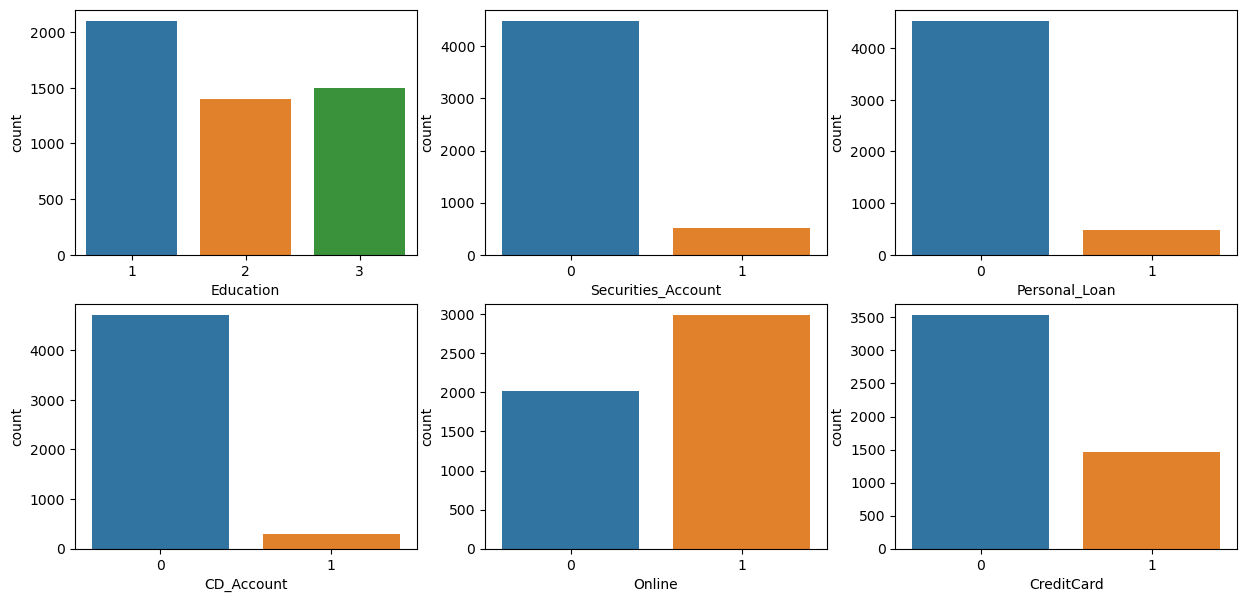

In [19]:
plt.figure(figsize=(15,7))
#countplot of Education
plt.subplot(2,3,1)
sns.countplot(data = loan, x = 'Education')
#histogram of Securities_Account
plt.subplot(2,3,2)
sns.countplot(data = loan, x = 'Securities_Account')
#histogram of Personal_Loan
plt.subplot(2,3,3)
sns.countplot(data = loan, x = 'Personal_Loan')
#histogram of CD_Account
plt.subplot(2,3,4)
sns.countplot(data = loan, x = 'CD_Account')
#histogram of Online
plt.subplot(2,3,5)
sns.countplot(data = loan, x = 'Online')
#histogram of CreditCard
plt.subplot(2,3,6)
sns.countplot(data = loan, x = 'CreditCard')
plt.show();

* The client composition is majorly undergraduates while there is no significant gap between the number of graduates and professional
* More than 90percent of the customers do not have securities account
* Almost the same size of customers without securities account did not sign up for loan in the last campaign
* Same trend is seen in uptake of CD_Account, most customers did not subscribe to this product
* There is a higher number of customers with internet banking than those without the product
* About 30percent of the customers have credit card while the rest are not signed into this product


## Bivariate Analysis

<AxesSubplot:>

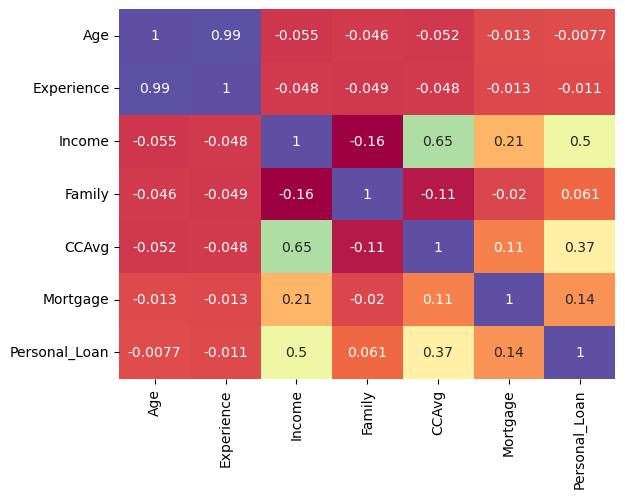

In [20]:
#correlation plot
sns.heatmap(loan[['Age','Experience','Income','Family','CCAvg','Mortgage','Personal_Loan']].corr(), annot = True, cbar = False, cmap = 'Spectral')

* Personal_Loan has the highest correlation with income and negative correlation with age and Experience
* Age and Experience has a very strong correlation, this may lead to multicollinearity issues in modelling. Experience should be dropped as age is more conceptually relevant to the target variable
* There is also a positive correlation between income and credit card monthly spending

### Personal_Loan Vs Numerical variables

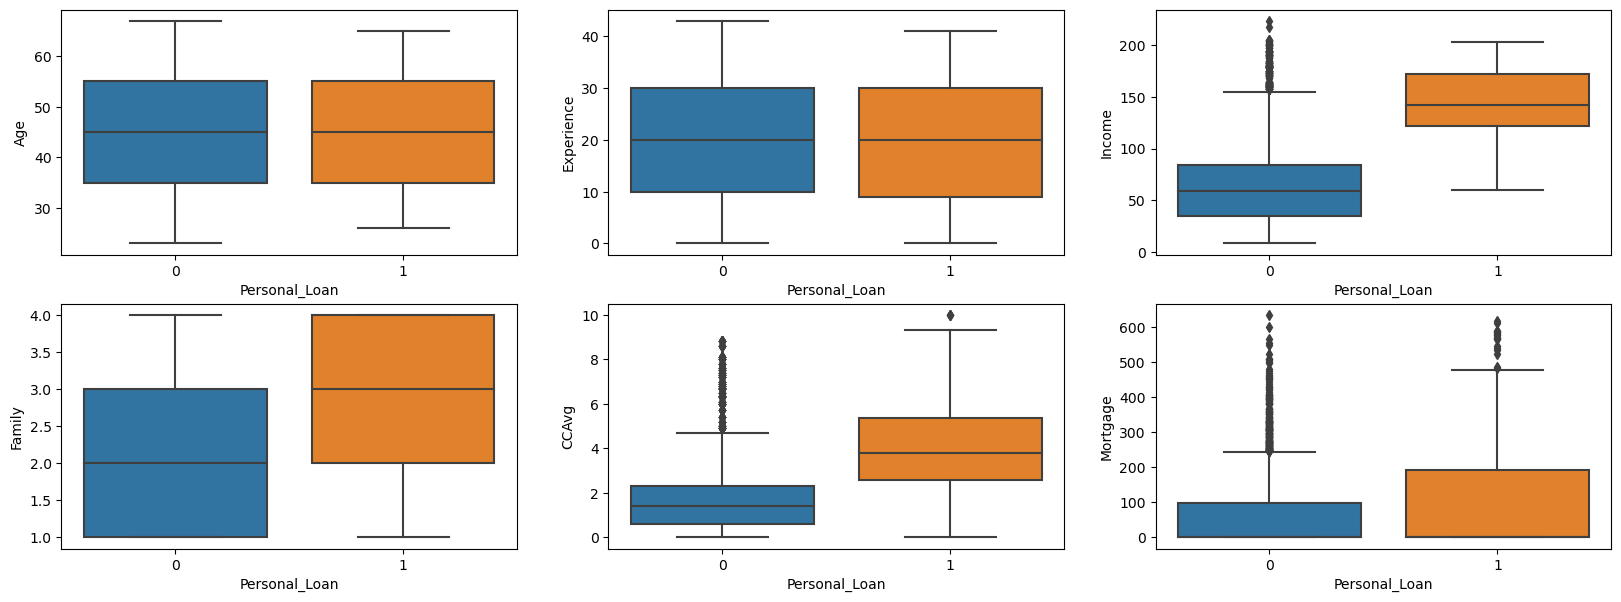

In [21]:
plt.figure(figsize=(20,7))
#Personal_Loan Vs Age
plt.subplot(2,3,1)
sns.boxplot(data = loan, x = 'Personal_Loan', y = 'Age')
#Personal_Loan Vs experience
plt.subplot(2,3,2)
sns.boxplot(data = loan,x = 'Personal_Loan',y = 'Experience')
#Personal_Loan Vs income
plt.subplot(2,3,3)
sns.boxplot(data = loan, x = 'Personal_Loan',y = 'Income')
#Personal_Loan Vs Family
plt.subplot(2,3,4)
sns.boxplot(data = loan, x = 'Personal_Loan',y = 'Family')
#Personal_Loan Vs CCAvg
plt.subplot(2,3,5)
sns.boxplot(data = loan, x = 'Personal_Loan',y = 'CCAvg')
#hPersonal_Loan Vs mortgage
plt.subplot(2,3,6)
sns.boxplot(data = loan, x = 'Personal_Loan',y = 'Mortgage')
plt.show();

* Uptake of the Personal_Loan product appears not to be significantly influenced by age and experience
* Higher income earners subscribe more to the Personal_Loan product
* The bigger the family size, the more the probability of using the Personal loan product, probably as family needs increases
* Personal loan users have higher monthly card spending 
* Clients with personal loan tend to have bigger mortgage value

### Personal_Loan Vs Categorical/Numerical Variables

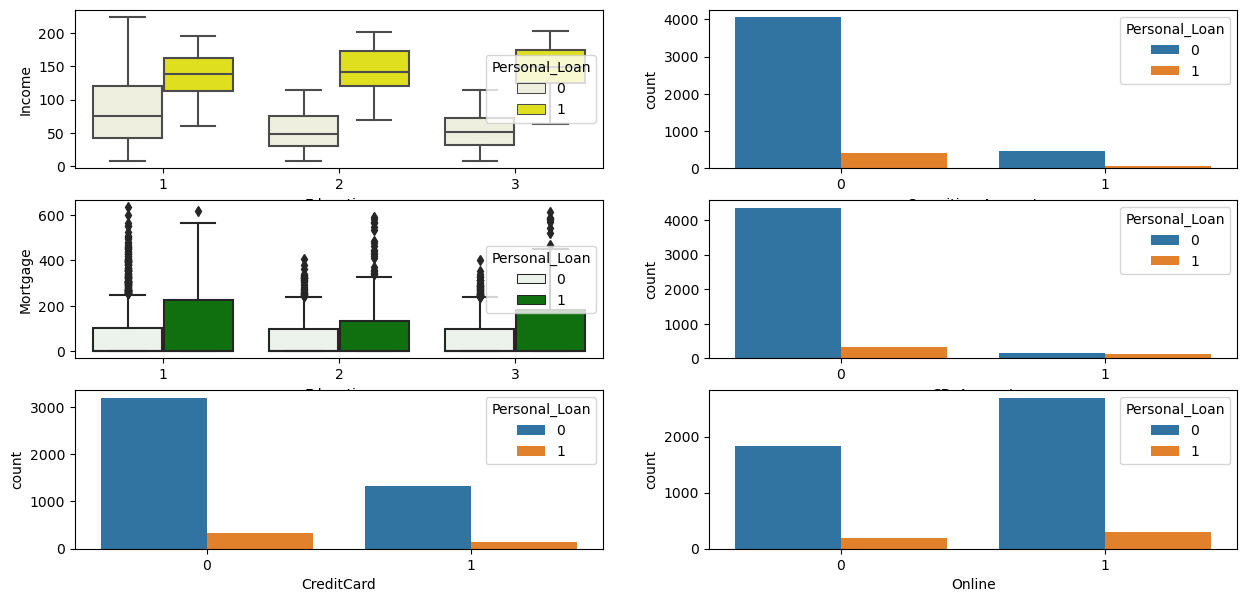

In [22]:
plt.figure(figsize=(15,7))
#personal_loan vs education vs income
plt.subplot(3,2,1)
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=loan, color='yellow')
#personal_loan vs securities_account
plt.subplot(3,2,2)
sns.countplot(x="Securities_Account", data=loan,hue="Personal_Loan")
#peronal_loan vs education vs mortgage
plt.subplot(3,2,3)
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=loan,color='green')
#peronal_loan vs CD_account
plt.subplot(3,2,4)
sns.countplot(x='CD_Account',data=loan,hue='Personal_Loan')
#peronal_loan vs CreditCard
plt.subplot(3,2,5)
sns.countplot(x='CreditCard',data=loan,hue='Personal_Loan')
#peronal_loan vs Online
plt.subplot(3,2,6)
sns.countplot(x='Online',data=loan,hue='Personal_Loan');

* customers at all income levels uses personal loan. customers will level 1 education earn higher and could be a target market for personal loan
* Customers who does not have CD account , does not have loan as well. However, almost all customers who has CD account has loan as well
* Customers with personal loan has higher mortgage than those without, customers without personal loan appear to be on the same level of mortgage value for all education level. Education level 1 has the highest number of mortgage

### Data Preparation for model building

In [23]:
# Library to split data
from sklearn.model_selection import train_test_split
X = loan.drop(["Personal_Loan","Experience"], axis=1)#experience is also dropped to due high correlation with age
Y = loan["Personal_Loan"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

### model evaluation criterion

Possibility of wrong prediction:
1. predicting a liability customer will buy a personal loan but in reality the customer would not- Loss of resources
2. predicting  a liability customer will not buy a personal loan but in reality the customer would have bought the product- Loss of opportunity

### model performance evaluation selection
It is more important that we predict a customer that will buy personal loan product as a customer who will not buy. To maximise this opportunity, we need to minimize false negatives. Hence recall should be maximised

* Create a function that calculates the recall score of the models for comparison and a function that plots the confusion matrix

In [24]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [25]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model building - Logistic Regression

In [26]:

# To build model for prediction

from sklearn.linear_model import LogisticRegression
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
#build model
lg = LogisticRegression(solver="liblinear", random_state=1)
model = lg.fit(X_train, y_train)

In [27]:
#predict on train
y_predict = model.predict(X_train)

#### performance of our logistics regression model on train set

In [28]:
#calculate model accuracy on train set
model_score = model.score(X_train, y_train)
print(model_score)

0.9491428571428572


In [29]:
#recall score on train set
logistics_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score on train set:", logistics_perf_train)

Recall Score on train set: 0.5861027190332326


#### performance of our logistics regression on test set

In [30]:
#calculate model accuracy on test set
model_score2 = model.score(X_test, y_test)
print(model_score2)

0.9426666666666667


In [31]:
#compute recall on test set
logistics_perf_test = get_recall_score(model, X_test, y_test)

print("Recall Score on test set:", logistics_perf_test)

Recall Score on test set: 0.5100671140939598


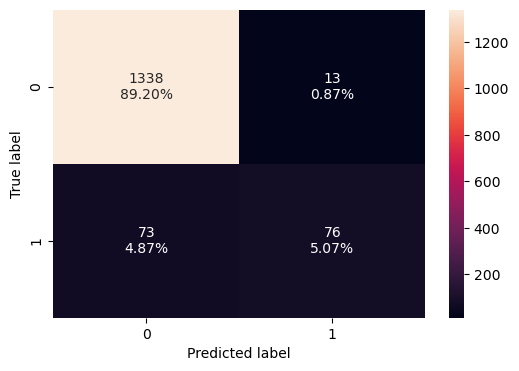

In [32]:
#plot confusion matrix on test set
confusion_matrix_sklearn(model, X_test, y_test)

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [34]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.949143,0.586103,0.825532,0.685512


In [35]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_train_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.942667,0.510067,0.853933,0.638655


### Comments on logistic regression model
* The model accuracy score on both test and training set achieved approximately 94% accuracy 
* There is also a high precision score  of 82% and 85% for train and test set respectively 
* However our desired performance metric is recall score which performed poorly for both test and train set with values of 0.51 and 0.58. 

### Building Decision Tree model

In [36]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Buid the model
dTmodel = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [37]:
dTmodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

####  Checking model performance on training set

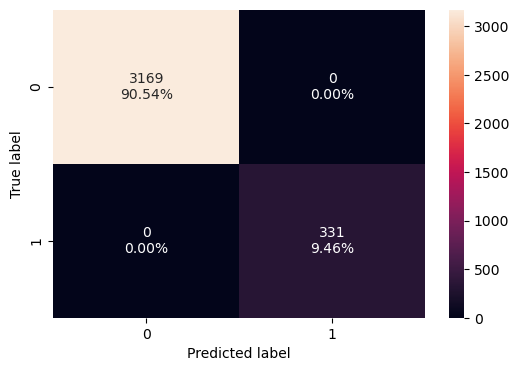

In [38]:
confusion_matrix_sklearn(dTmodel, X_train, y_train)


In [39]:
decision_tree_perf_train = get_recall_score(dTmodel, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)


Recall Score: 1.0


#### Checking model performance on test set

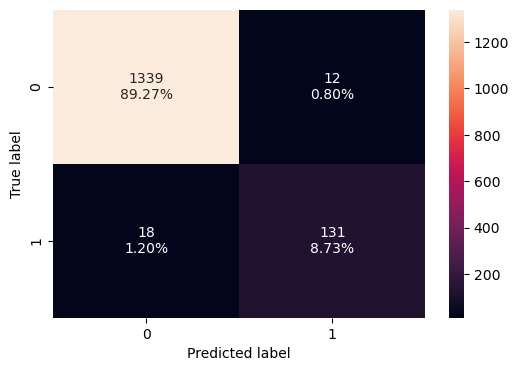

In [40]:
confusion_matrix_sklearn(dTmodel, X_test, y_test)


In [41]:
decision_tree_perf_test = get_recall_score(dTmodel, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8791946308724832


### Visualising Tree

In [42]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


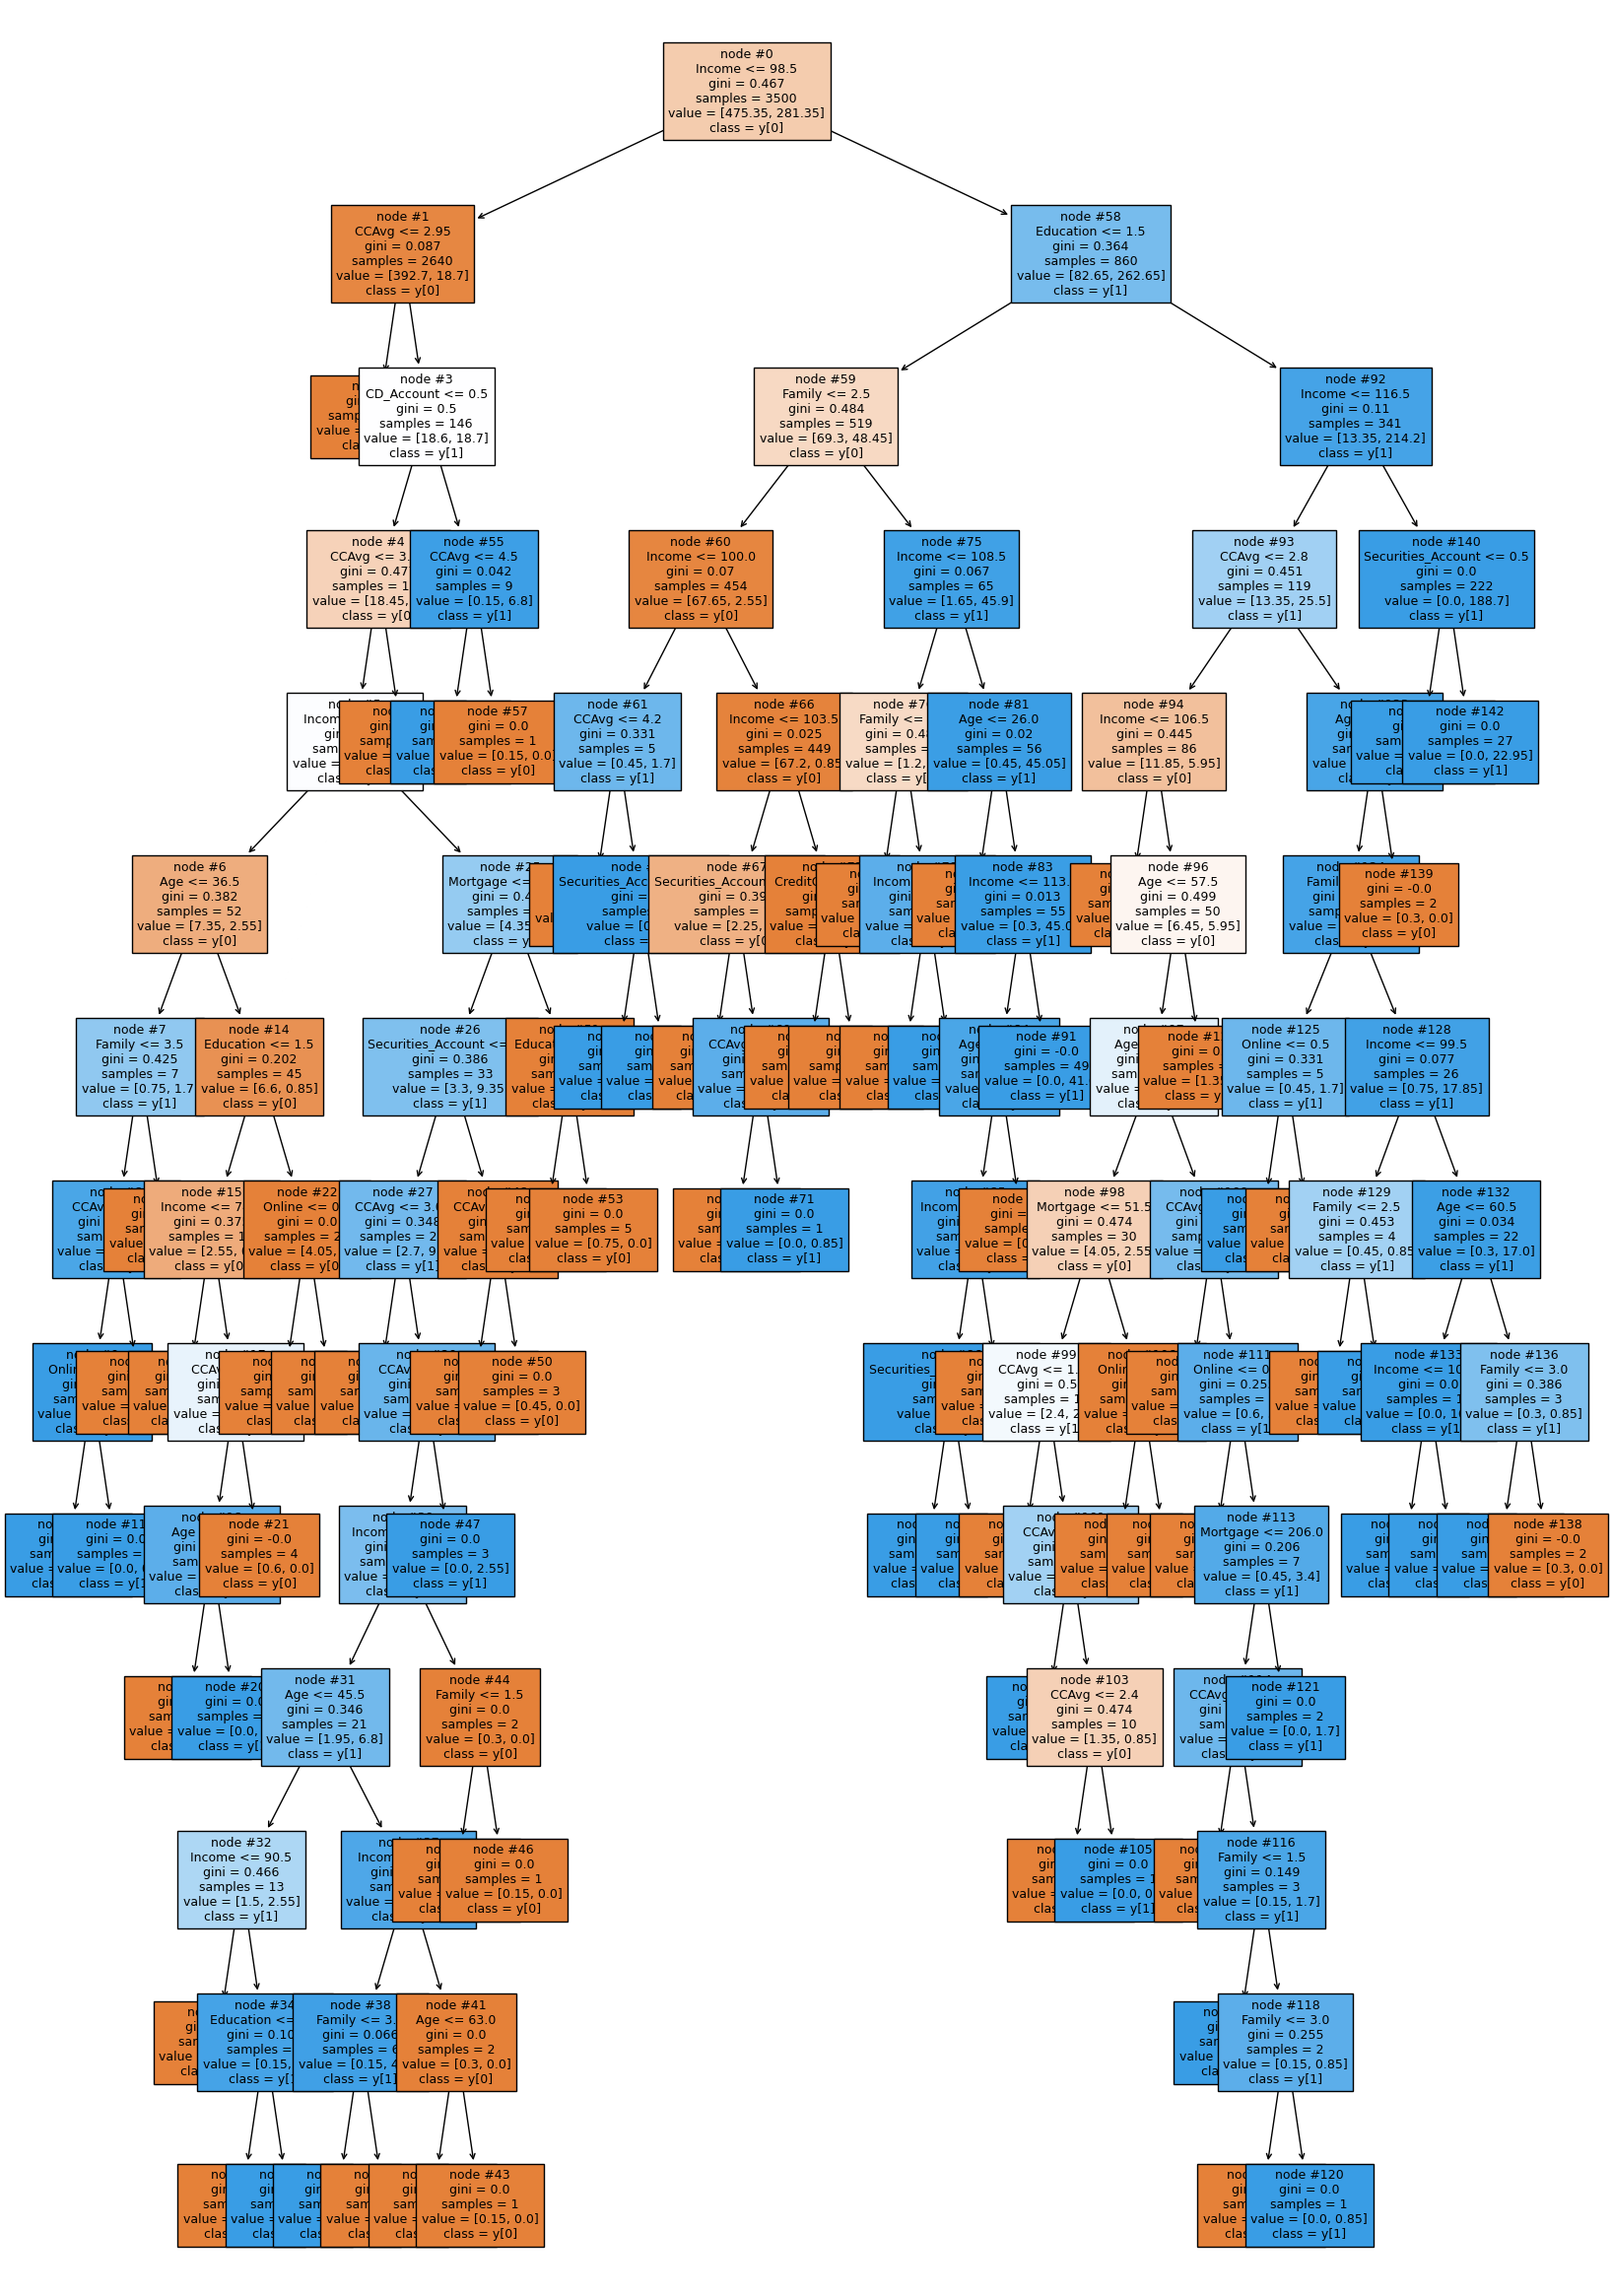

In [43]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTmodel,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [44]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTmodel,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- Income <= 74.50
|   |   |   |   |   |   |   |   |--- weights: [1.80, 

In [46]:
#computing the Gini feature importance 

print (pd.DataFrame(dTmodel.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Income              5.984421e-01
Family              1.475085e-01
Education           1.247195e-01
CCAvg               9.311823e-02
Age                 1.275528e-02
CD_Account          1.099955e-02
Mortgage            5.090297e-03
Securities_Account  4.716203e-03
Online              2.650274e-03
CreditCard          2.447958e-16


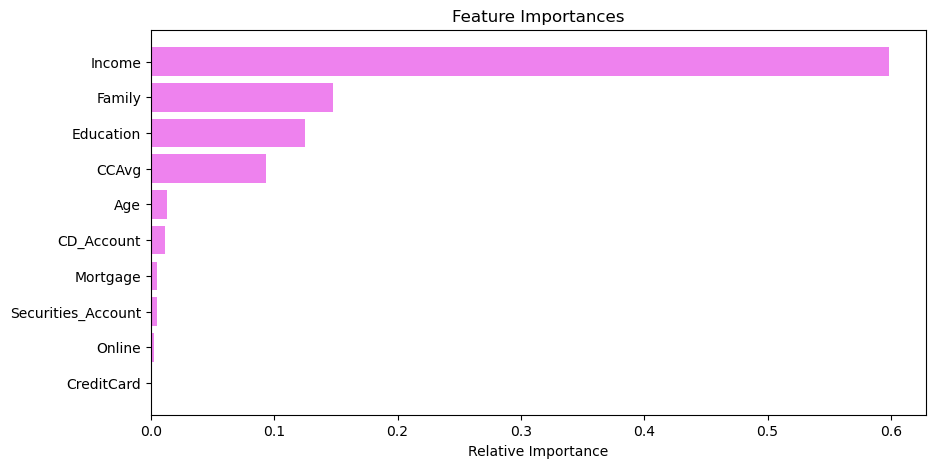

In [49]:
#plot Feature importance
importances = dTmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Using Pre-prunning to cut down  the complexity of the decision tree and reduce over-fitting

In [50]:
#specify max depth as 3
dt_model2=DecisionTreeClassifier(criterion = 'gini',max_depth=3)
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

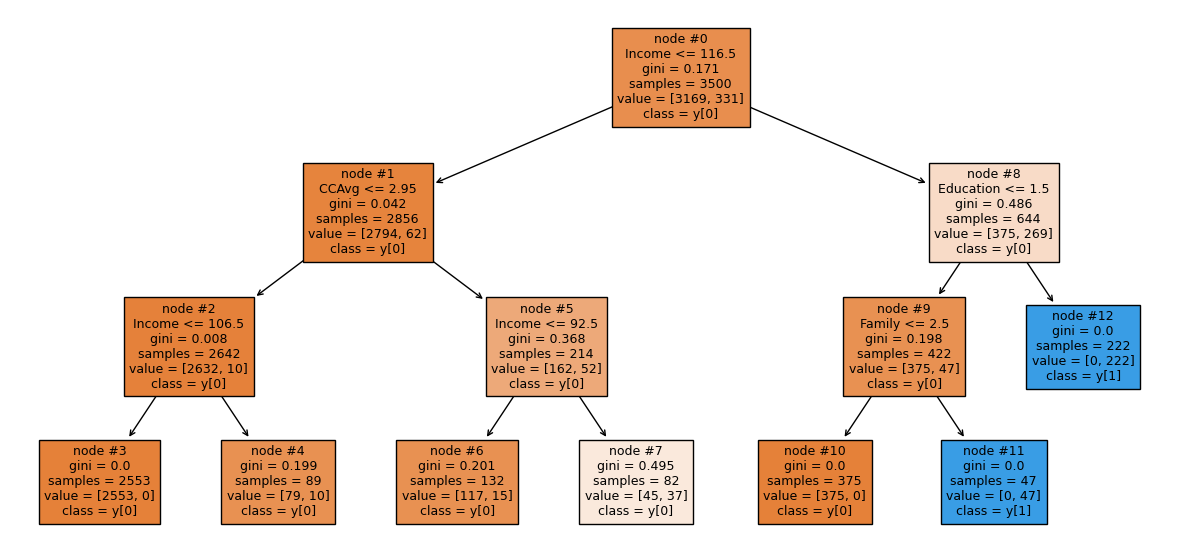

In [51]:
#plot decision tree
plt.figure(figsize=(15,7))
tree.plot_tree(dt_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

#### Performance of Decision Tree after pruning

In [52]:
decision_tree_perf_train2 = get_recall_score(dt_model2, X_train, y_train)

print("Recall Score:", decision_tree_perf_train2)


Recall Score: 0.8126888217522659


In [69]:
decision_tree_perf_train3 = get_recall_score(dt_model2, X_test, y_test)

print("Recall Score:", decision_tree_perf_train3)


Recall Score: 0.7516778523489933


### Comments on Decision Tree model
* Initially, Our decision tree model achieved a 100% recall score on train set which shows some level of over-fitting. This is expectedly because the model was trained without pruning noting that  decision trees are prone to over-fitting
* The recall score on the decision tree on test set without pruning is 0.87 which is remarkably higher and better than that of logistics regression 
* When pre-pruning was applied on the decision tree, the complexity of the tree and over-fitting was reduced.
* The recall score on train set and test set after pre-pruning is 0.81 and 0.75 respectively

### Model selection
Since we aim to maximize recall score ,Decision Tree algorithm have the highest recall score therefore should be chosen as our final model

## Actionable Insights & Recommendations
* Very few customers are using the personal loan product hence the importance of aggresive marketing on the product
* Most of the customers have a credit card spend limit less than usd3000 per month
* Most customers have no mortgage, the benefits of mortgage can be used to cross sell personal loan for these customers 
* Most customers are without securities account and did not sign up for loan in the last campaign, Same trend is seen in uptake of CD_Account. This trend can be used by the marketing team to bundle products together with cross benefits
* Higher income earners subscribe more to the Personal_Loan product, they should be the target market
* The bigger the family size, the more the probability of using the Personal loan product, probably as family needs increases. This should be a marketing strategy
* Customers on education level 1 (undergrads) should be a major target market as they appear to have more need for personal loan than professionals


